<a href="https://colab.research.google.com/github/BradenAnderson/Twitter-Sentiment-Analysis/blob/main/02_2_vaderSentiment_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 1000)

In [ ]:
# Read in the tweet data files with VADER sentiment scores associated with various data cleaning decisions.
vader_tweet_no_cleaning_filename = "/content/drive/MyDrive/Programming/Colab Notebooks/Coding_Dojo/Twitter_Sentiment_Project/intermediate_output_files/vader_no_data_cleaning.csv"
vader_tweet_no_websites_filename = "/content/drive/MyDrive/Programming/Colab Notebooks/Coding_Dojo/Twitter_Sentiment_Project/intermediate_output_files/vader_websites_removed.csv"
vader_tweet_sentence_filename = "/content/drive/MyDrive/Programming/Colab Notebooks/Coding_Dojo/Twitter_Sentiment_Project/intermediate_output_files/vader_sentence_level.csv"
vader_tweet_no_handle_filename = "/content/drive/MyDrive/Programming/Colab Notebooks/Coding_Dojo/Twitter_Sentiment_Project/intermediate_output_files/vader_handles_removed.csv"
vader_tweet_full_preprocess_filename = "/content/drive/MyDrive/Programming/Colab Notebooks/Coding_Dojo/Twitter_Sentiment_Project/intermediate_output_files/vader_full_preprocessing.csv"

vtweet_no_c_df = pd.read_csv(vader_tweet_no_cleaning_filename)
vtweet_no_w_df = pd.read_csv(vader_tweet_no_websites_filename)
vtweet_s_level_df = pd.read_csv(vader_tweet_sentence_filename)
vtweet_no_h_df = pd.read_csv(vader_tweet_no_handle_filename)
vtweet_full_processed_df = pd.read_csv(vader_tweet_full_preprocess_filename)

In [ ]:
# Read in the analysis file created in the 02_vaderSentiment notebook.
filename = "/content/drive/MyDrive/Programming/Colab Notebooks/Coding_Dojo/Twitter_Sentiment_Project/intermediate_output_files/vaderSentiment_Analysis.csv"

vader_df = pd.read_csv(filename, index_col=0)

vader_df.head(10)

,Accuracy,Sensitivity,Specificity,Precision,True_Positives,True_Negatives,False_Positives,False_Negatives,Removed_Twitter_Handles,Removed_Websites,Performed_Sentence_Tokenization,Decision_Threshold
0,0.929854,0.000000,1.000000,NaN,0,29720,0,2242,True,True,True,-0.990000
1,0.929854,0.000000,1.000000,NaN,0,29720,0,2242,True,True,True,-0.985038
2,0.929854,0.000000,1.000000,NaN,0,29720,0,2242,True,True,True,-0.980075
3,0.929854,0.000000,1.000000,NaN,0,29720,0,2242,True,True,True,-0.975113
4,0.929885,0.000446,1.000000,1.000000,1,29720,0,2241,True,True,True,-0.970150
5,0.929854,0.000446,0.999966,0.500000,1,29719,1,2241,True,True,True,-0.965188
6,0.929823,0.000446,0.999933,0.333333,1,29718,2,2241,True,True,True,-0.960226
7,0.929792,0.000446,0.999899,0.250000,1,29717,3,2241,True,True,True,-0.955263
8,0.929792,0.000446,0.999899,0.250000,1,29717,3,2241,True,True,True,-0.950301
9,0.929760,0.000446,0.999865,0.200000,1,29716,4,2241,True,True,True,-0.945338


In [ ]:
# If nothing was predicted to be in the positive class, Precision = (TP / TP + FP) is undefined. Drop these rows because they are not useful.
vader_df.dropna(inplace=True)

In [ ]:
# Create a new column for the F1 score, calculated as: F1_Score = 2 * (Precision * Recall) / (Precision + Recall)
vader_df['F1_Score'] = 2 * (vader_df['Precision'] * vader_df['Sensitivity']) / (vader_df['Precision'] + vader_df['Sensitivity'])

# Create a new column for the "Balanced Accuracy", calculated as: Balanced_Accuracy = (Sensitivity + Specificity) / 2
vader_df['Balanced_Accuracy'] = (vader_df['Sensitivity'] + vader_df['Specificity']) / 2

vader_df = vader_df.sort_values(by='F1_Score', ascending=False)

vader_df.head()

,Accuracy,Sensitivity,Specificity,Precision,True_Positives,True_Negatives,False_Positives,False_Negatives,Removed_Twitter_Handles,Removed_Websites,Performed_Sentence_Tokenization,Decision_Threshold,F1_Score,Balanced_Accuracy
2940,0.834116,0.347012,0.870861,0.168544,778,25882,3838,1464,False,False,False,-0.295263,0.226888,0.608936
1340,0.834116,0.347012,0.870861,0.168544,778,25882,3838,1464,True,False,False,-0.295263,0.226888,0.608936
540,0.834116,0.347012,0.870861,0.168544,778,25882,3838,1464,True,True,False,-0.295263,0.226888,0.608936
2140,0.834116,0.347012,0.870861,0.168544,778,25882,3838,1464,False,True,False,-0.295263,0.226888,0.608936
2143,0.833177,0.348350,0.869751,0.167885,781,25849,3871,1461,False,True,False,-0.280376,0.226574,0.609050


# Plot the classification metrics for the base case where no preprocessing was applied. 


Removed Twitter Handles = False

Removed Websites = False

Performed Sentence Tokenization = False


In [ ]:
# Create filters for website removal, twitter handle removal and sentence analysis all False.
no_website_removal = (vader_df['Removed_Websites'] == False)
no_twitter_handle_removal = (vader_df['Removed_Twitter_Handles'] == False)
no_sentence_tokenization = (vader_df['Performed_Sentence_Tokenization'] == False)

# Combine the three filters created above.
no_preprocessing = no_website_removal & no_twitter_handle_removal & no_sentence_tokenization

# Create a new dataframe that only contains classification results where no preprocessing was applied.
vader_no_preprocess_df = vader_df.loc[no_preprocessing, :]

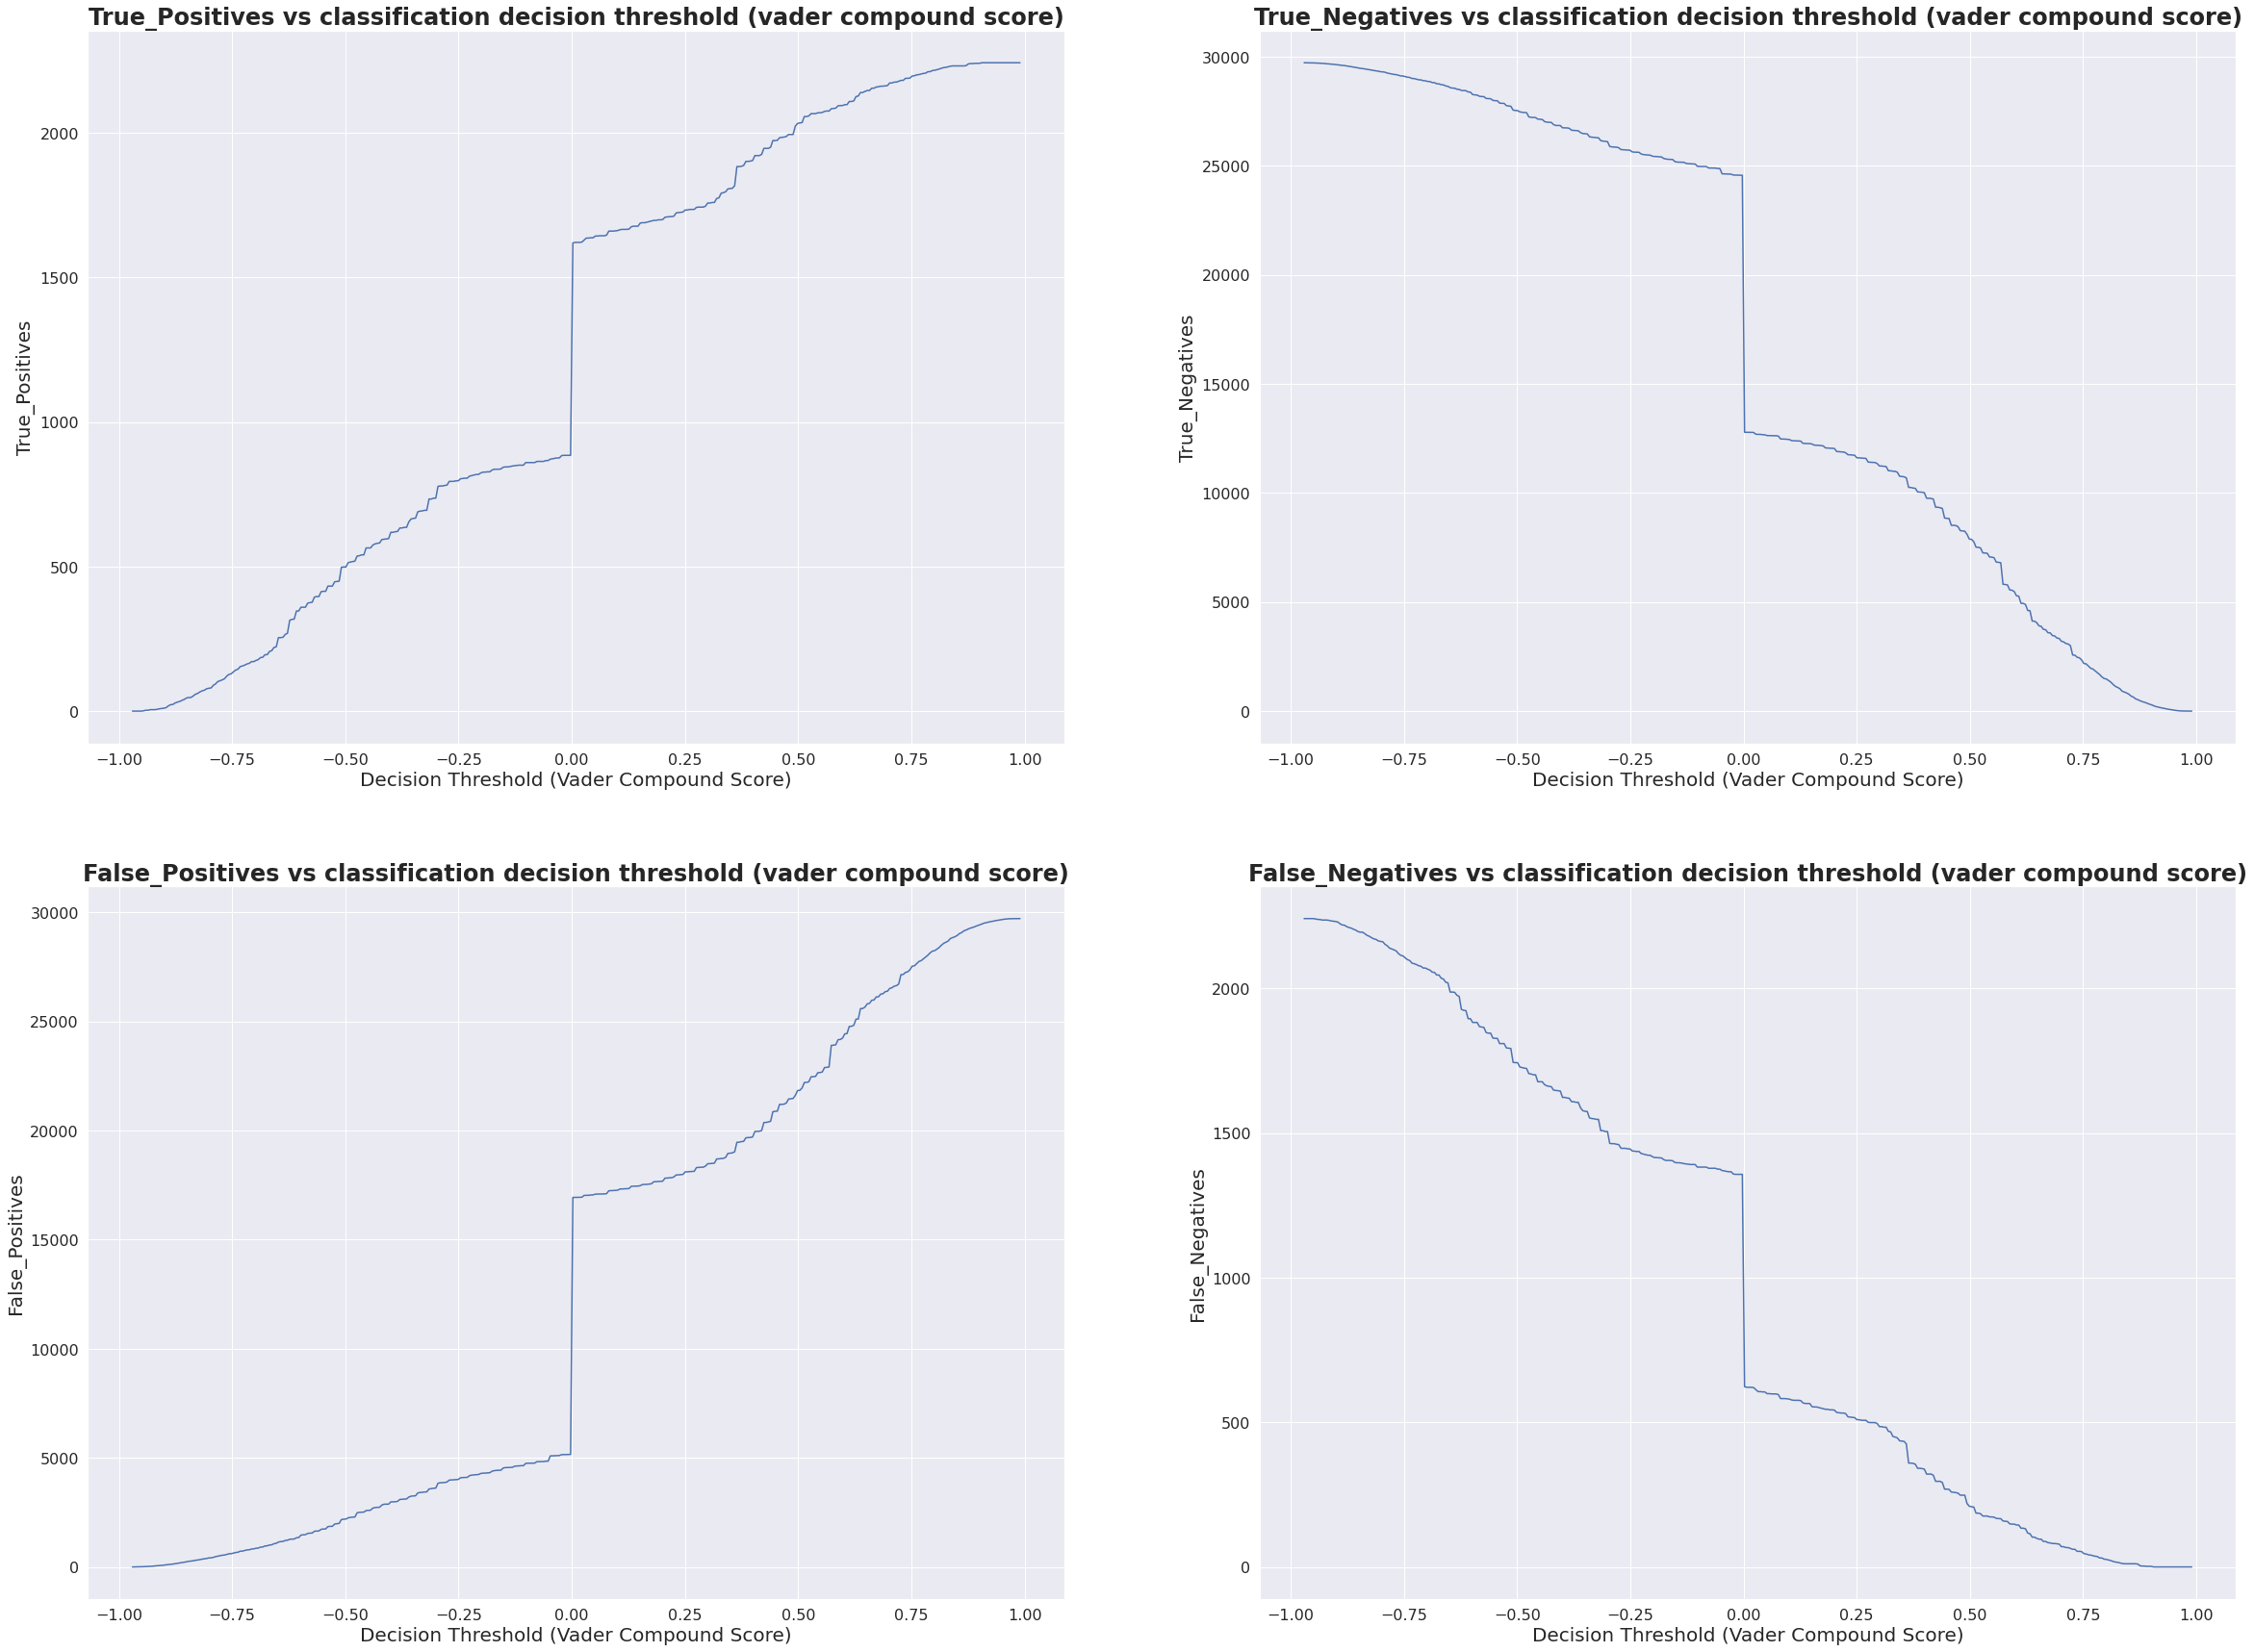

In [ ]:
# Plot the confusion matrix parameters vs decision threshold (VADER compound score) for base case of no data cleaning.

sns.set_style('darkgrid')

fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (40, 30), squeeze=False)

confusion_params = ['True_Positives', 'True_Negatives', 'False_Positives', 'False_Negatives']

for index, param in enumerate(confusion_params): 

  row = index // 2
  col = index % 2

  sns.lineplot(x='Decision_Threshold', y=param, data=vader_no_preprocess_df, ax=axs[row][col])

  axs[row][col].set_title(param + " vs classification decision threshold (vader compound score)", fontsize=24, weight='bold')
  axs[row][col].set_xlabel("Decision Threshold (Vader Compound Score)", fontsize=20)
  axs[row][col].set_ylabel(param, fontsize=20)
  axs[row][col].tick_params(axis='both', labelsize=16)

  #----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
  # Observations:
  #
  # There is a clear discontinuity in all four confusion matrix parameters at the point when the value of the vader compound score that we are using as our classification
  # threshold crosses zero.
  #
  # Specifically, when the vader compound score crosses from -0.002481 to 0.022331  
  # 
  # True Positives jump up from 885 to 1622. The "True Positives" represent the number of tweets that we correctly classified as hate speech. This result means
  # that there must be 1622 - 885 = 737 tweets that are actually hate speech but have a vader compound score between -0.002481 and 0.022331 (i.e. they are hate speech
  # but the vader compound score is essentially claiming that the sentiment is neutral). 
  #
  # True Negatives decrease from 24561 to 12774. The "True Negatives" represent that number of tweets that we correctly classified as not containing hate speech. Similar
  # to above, this result indicates that 24561 - 12774 = 11787 tweets that do not have hate speech have a vader compound score between -0.002481 and 0.022331 (neutral sentiment).
  #
  # False Positives increase from 5159 to 16946. The "False Positives" represent the number of tweets that were classified as hate speech, but actually were not. Again, 
  # this number indicates that 16946 - 5159 = 11787 tweets that do not contain hate speech will get classified as containing hate speech if the threshold is set to 
  # 0.022331, but will not get classified as containing hatespeech if the threshold is set to -0.002481. (i.e. 11781 tweets with nuetral sentiment that do not contain hate speech).
  #
  # False Negatives decrease from 1357 to 620. The "False Negatives" represent the number of tweets that we incorrectly classified as not containing hate speech 
  # (i.e. the number of hate speech containing tweets that were classified as non-hate speech). This result means that when the compound score decision threshold is
  # set to -0.002506, 1357 tweets that contain hate speech were incorrectly classified, and when the threshold moved to 0.022331 only 620 tweets containing hate speech
  # were incorrectly classified. Again, this tells us that 1357 - 620 = 737 tweets that contain hate speech have a vader compound sentiment score that is approximately 0. 
  #
  #----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#-----------------------------------------------------------------------------------------------------------------------------------------------------
# In the plots above we discussed the drastic shift in the confusion matrix parameters when the decision threshold shifts from slightly below
# to slightly above zero. Shown below are the dataframe rows around this area of interest.
#
#-----------------------------------------------------------------------------------------------------------------------------------------------------
vader_no_preprocess_df.loc[(vader_no_preprocess_df.index > 2995) & (vader_no_preprocess_df.index < 3005), ['True_Positives', 'True_Negatives', 'False_Positives', 'False_Negatives', 'Decision_Threshold']].head(10)

,True_Positives,True_Negatives,False_Positives,False_Negatives,Decision_Threshold
2996,885,24569,5151,1357,-0.017368
2997,885,24563,5157,1357,-0.012406
2998,885,24562,5158,1357,-0.007444
2999,885,24561,5159,1357,-0.002481
3004,1622,12774,16946,620,0.022331
3001,1621,12779,16941,621,0.007444
3002,1621,12779,16941,621,0.012406
3003,1621,12777,16943,621,0.017368
3000,1619,12782,16938,623,0.002481


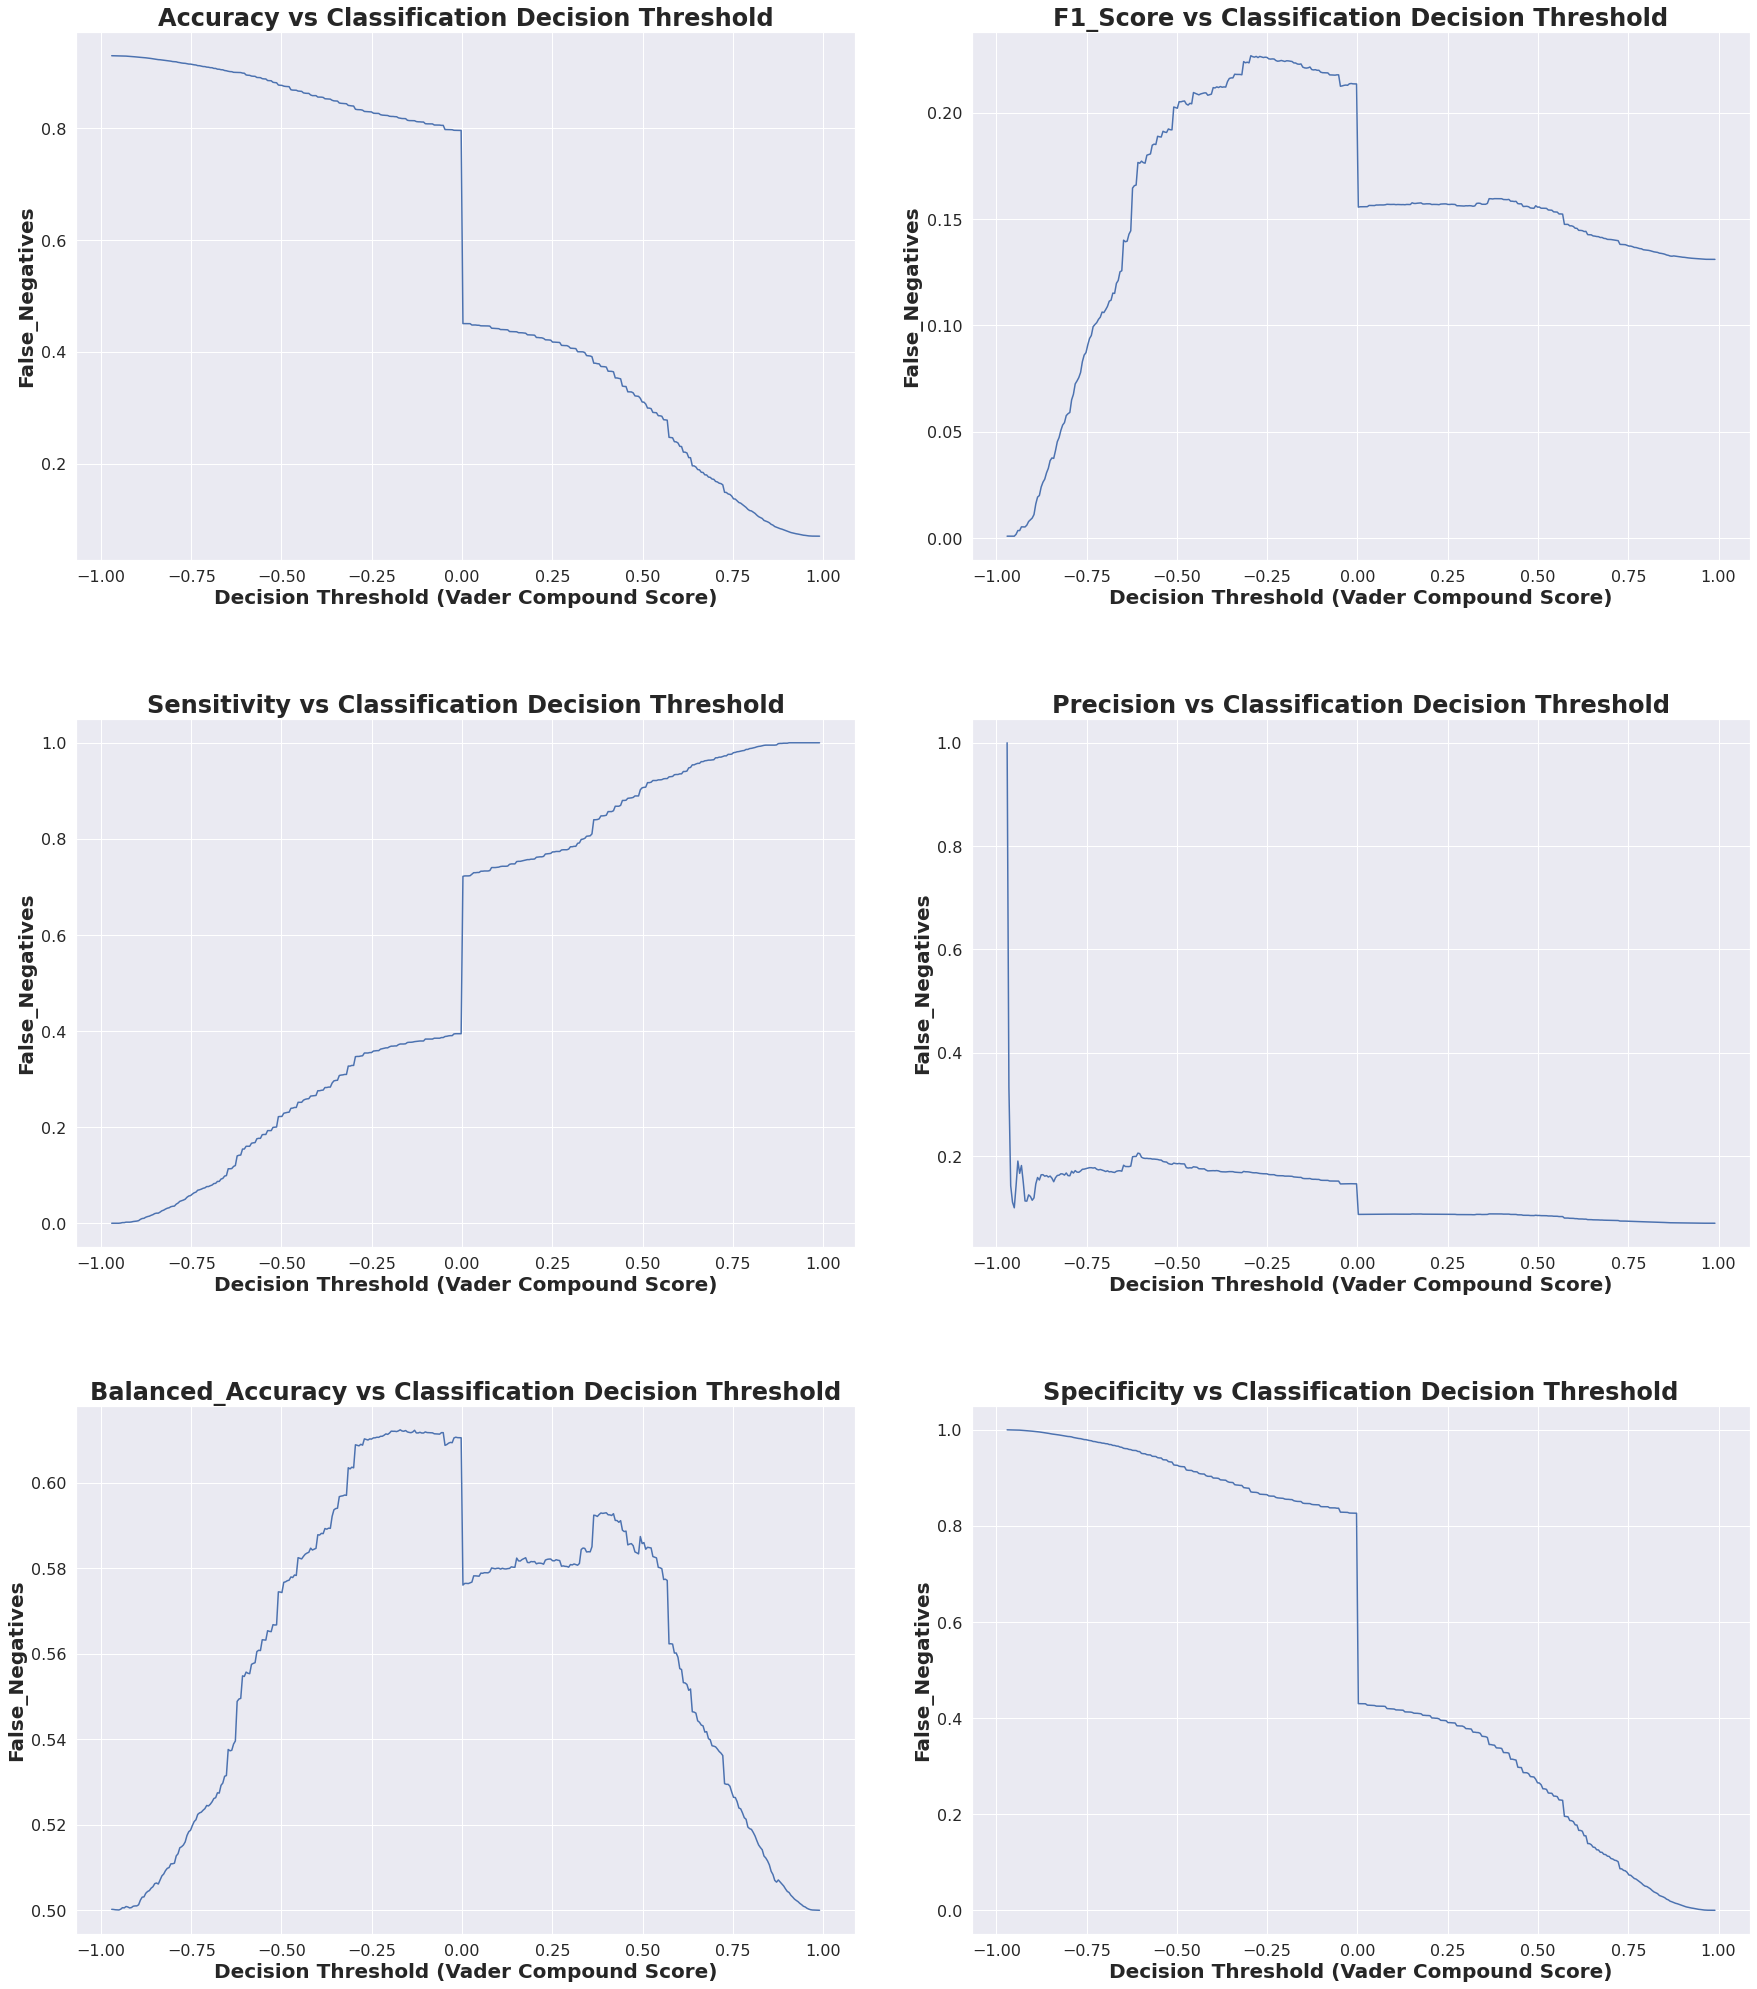

In [ ]:
# Plot the classification metrics vs decision threshold (VADER compound score) for base case of no data cleaning.

fig, axs = plt.subplots(nrows=3, ncols=2, figsize = (30, 35), squeeze=False, gridspec_kw = {'wspace':0.15, 'hspace':0.3})

classification_metrics = ['Accuracy', 'F1_Score', 'Sensitivity', 'Precision', 'Balanced_Accuracy', 'Specificity']

for index, metric in enumerate(classification_metrics): 

  row = index // 2
  col = index % 2

  sns.lineplot(x='Decision_Threshold', y=metric, data=vader_no_preprocess_df, ax=axs[row][col])

  axs[row][col].set_title(metric + " vs Classification Decision Threshold", fontsize=24, weight='bold')
  axs[row][col].set_xlabel("Decision Threshold (Vader Compound Score)", fontsize=20, weight='bold')
  axs[row][col].set_ylabel(param, fontsize=20, weight='bold')
  axs[row][col].tick_params(axis='both', labelsize=16)

  #--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
  # Observations
  # 
  # Accuracy: The accuracy is at its peak (almost 93%) when the decision threshold is -1. At a decision threshold of -1, we are saying that only tweets that get the
  #           lowest possible vader compound sentiment score should be classified as hate speech. In other words, with a decision threshold of -1 we are classifying
  #           everything as non-hate speech. Clearly this is not a reasonable threshold as a model that classifies everything as non hate speech would not be useful
  #           as a hate speech classifier. This means we need to use a different metric to determine what the best classification threshold is.
  #
  # F1_Score: The F1_Score is an alternate measure of a classifiers accuracy that is calculated as 2 * (precision * recall) / (precision + recall), where, 
  #           Precision = (true positives / (true positives + false positives)) = (correctly classified positives) / (all that were classified positive), and,
  #           Recall (i.e. Sensitivity or true positive rate) = (True Positives / True Positive + False Negatives)) = (correctly classified positives) / (all positive class members)
  #
  #           The F1 score conveys how balanced precision and recall are, and is a more useful metric for understanding how effective a classifier will be
  #           for a given task in the case where classes are imbalanced (we have many more examples of non-hate speech than hate speech.)
  #
  #
  # Precision: Precision answers the question, out of all the items we claimed were hate speech, how many of those were correct?
  #            Precision measures how "exact" the classifier is, and a low precision generally indicates a large number of false positives.
  #
  # Sensitivity: (i.e. recall or true positive rate) - answers the question: "What proportion of the hate speech tweets were properly detected"?
  #               Sensitivity can be thought of as a measure of the classifiers completeness, and low sensitivity generally indicates many false negatives. 
  # 
  # Specificity (i.e. selectivity or true negative rate) - answers the question: "How many non-hate tweets were properly classified"?
  #
  # Balanced_Accuracy: This is just the mean of sensitivity and specificity, where, Balanced_Accuracy = (Sensitivity + Specificity) / 2
  #
  #--------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#-------------------------------------------------------------------------------------------------------------------------------------------
# Showning the dataframe rows where the F1_Score is maximized. 
#
# For the case where no data cleaning is applied, the F1_Score is maximized at a decision threshold of -0.295263
#-------------------------------------------------------------------------------------------------------------------------------------------
vader_df.loc[vader_df['F1_Score'] == vader_df['F1_Score'].max(), :]

,Accuracy,Sensitivity,Specificity,Precision,True_Positives,True_Negatives,False_Positives,False_Negatives,Removed_Twitter_Handles,Removed_Websites,Performed_Sentence_Tokenization,Decision_Threshold,F1_Score,Balanced_Accuracy
2940,0.834116,0.347012,0.870861,0.168544,778,25882,3838,1464,False,False,False,-0.295263,0.226888,0.608936
1340,0.834116,0.347012,0.870861,0.168544,778,25882,3838,1464,True,False,False,-0.295263,0.226888,0.608936
540,0.834116,0.347012,0.870861,0.168544,778,25882,3838,1464,True,True,False,-0.295263,0.226888,0.608936
2140,0.834116,0.347012,0.870861,0.168544,778,25882,3838,1464,False,True,False,-0.295263,0.226888,0.608936


In [ ]:
#-------------------------------------------------------------------------------------------------------------------------------------------
# Showning the dataframe rows where the Balanced Accuracy is maximized. 
#
# For the case where no data cleaning is applied, the Balanced Accuracy is maximized at a decision threshold of -0.171203
#-------------------------------------------------------------------------------------------------------------------------------------------
vader_df.loc[vader_df['Balanced_Accuracy'] == vader_df['Balanced_Accuracy'].max(), :]

,Accuracy,Sensitivity,Specificity,Precision,True_Positives,True_Negatives,False_Positives,False_Negatives,Removed_Twitter_Handles,Removed_Websites,Performed_Sentence_Tokenization,Decision_Threshold,F1_Score,Balanced_Accuracy
1365,0.818003,0.373327,0.851548,0.159459,837,25308,4412,1405,True,False,False,-0.171203,0.223468,0.612438
2965,0.818003,0.373327,0.851548,0.159459,837,25308,4412,1405,False,False,False,-0.171203,0.223468,0.612438
565,0.818003,0.373327,0.851548,0.159459,837,25308,4412,1405,True,True,False,-0.171203,0.223468,0.612438
2165,0.818003,0.373327,0.851548,0.159459,837,25308,4412,1405,False,True,False,-0.171203,0.223468,0.612438


# Plot the distribution of compound scores for hate-speech vs non hate-speech tweets.

Note: Initially only plotting for the base case where no data cleaning was applied. 

Removed Twitter Handles = False

Removed Websites = False

Performed Sentence Tokenization = False


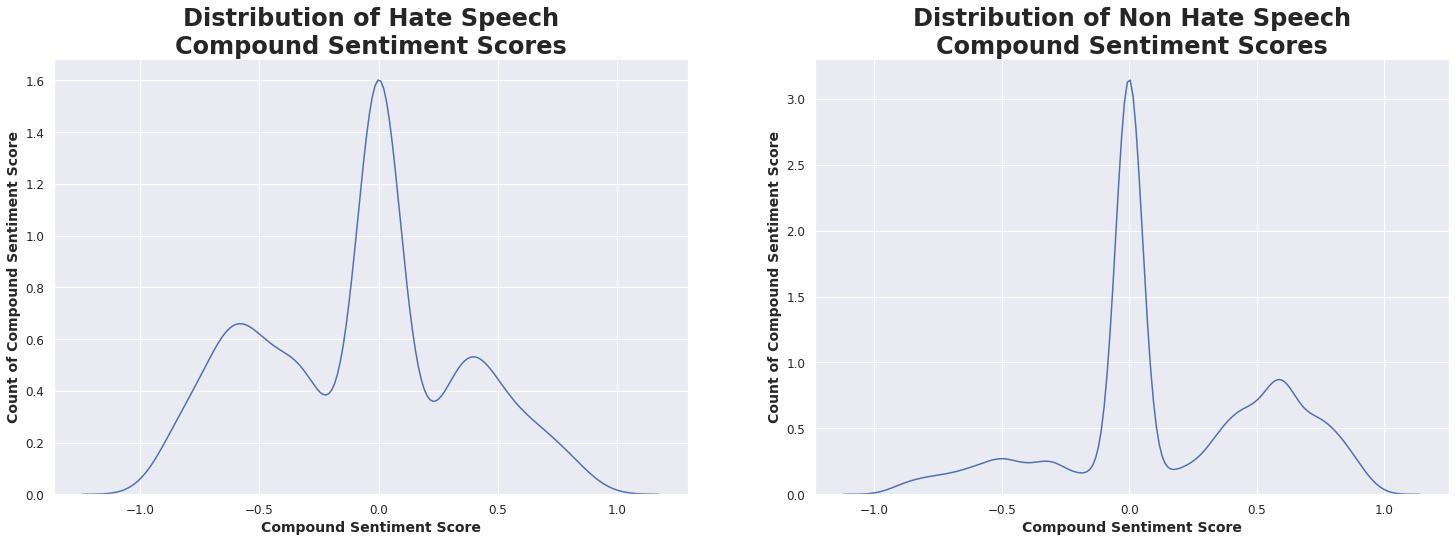

In [ ]:
#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# In this cell we plot the distribution of compound sentiment scores for hate speech vs not hate speech tweets.
#
# The compound scores were calculated using vader sentiment on raw tweets, without any preprocessing/data cleaning steps. 
#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (25, 8), squeeze=False)

hate_speech_df = vtweet_no_c_df.loc[vtweet_no_c_df['label'] == 1, :]
non_hate_speech_df = vtweet_no_c_df.loc[vtweet_no_c_df['label'] == 0, :]

sns.kdeplot(x='Compound_Sentiment_Score', data=hate_speech_df, ax=axs[0][0]);
sns.kdeplot(x='Compound_Sentiment_Score', data=non_hate_speech_df, ax=axs[0][1]);

axs[0][0].set_title("Distribution of Hate Speech\nCompound Sentiment Scores", fontsize=24, weight='bold')
axs[0][0].set_xlabel("Compound Sentiment Score", fontsize=14, weight='bold')
axs[0][0].set_ylabel("Count of Compound Sentiment Score", fontsize=14, weight='bold')
axs[0][0].tick_params(axis='both', labelsize=12)

axs[0][1].set_title("Distribution of Non Hate Speech\nCompound Sentiment Scores", fontsize=24, weight='bold')
axs[0][1].set_xlabel("Compound Sentiment Score", fontsize=14, weight='bold')
axs[0][1].set_ylabel("Count of Compound Sentiment Score", fontsize=14, weight='bold')
axs[0][1].tick_params(axis='both', labelsize=12)

#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# These distributions shown below are suprising. Although there seems to be some indications that Non-Hate Speech tweets are more likely to be positive (second peak on
# the right hand side plot) and hate speech tweets are a little bit more likely to be negative (slightly higher peak on the negative side of the hate speech plot) these
# differences are minimal.
#
# In general, both hate speech and non-hate speech tweets tend to have a neutral sentiment: 
# Average compound score hate speech = -0.08362760927743093
# Average compound score non hate speech = 0.15854374495289197
#
# The fact that distribution of compound scores for hate speech and non hate speech tweets are so similar means that even if the optimal classification 
# threshold is found vaderSentiment will have a difficult time effectively classifying tweets in this manner.
#
#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

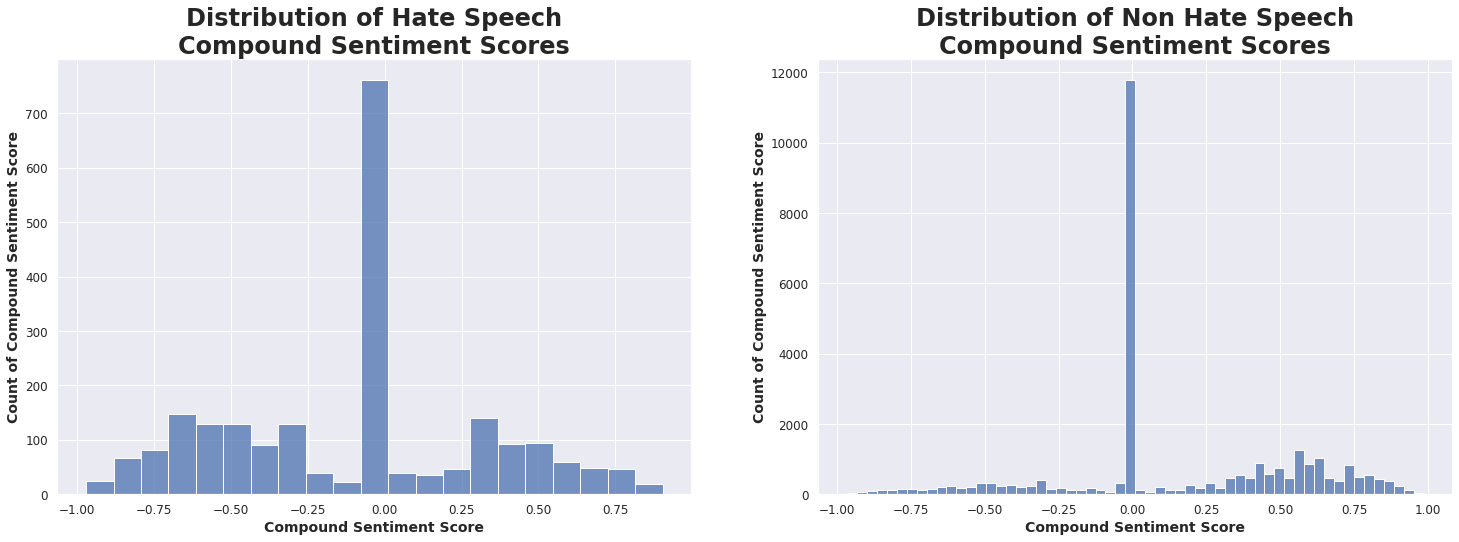

In [ ]:
#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# This is the same data that is shown in the plot above, presented as a histogram instead of a density plot.
# 
#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (25, 8), squeeze=False)

hate_speech_df = vtweet_no_c_df.loc[vtweet_no_c_df['label'] == 1, :]
non_hate_speech_df = vtweet_no_c_df.loc[vtweet_no_c_df['label'] == 0, :]

sns.histplot(x='Compound_Sentiment_Score', data=hate_speech_df, ax=axs[0][0]);
sns.histplot(x='Compound_Sentiment_Score', data=non_hate_speech_df, ax=axs[0][1]);

axs[0][0].set_title("Distribution of Hate Speech\nCompound Sentiment Scores", fontsize=24, weight='bold')
axs[0][0].set_xlabel("Compound Sentiment Score", fontsize=14, weight='bold')
axs[0][0].set_ylabel("Count of Compound Sentiment Score", fontsize=14, weight='bold')
axs[0][0].tick_params(axis='both', labelsize=12)

axs[0][1].set_title("Distribution of Non Hate Speech\nCompound Sentiment Scores", fontsize=24, weight='bold')
axs[0][1].set_xlabel("Compound Sentiment Score", fontsize=14, weight='bold')
axs[0][1].set_ylabel("Count of Compound Sentiment Score", fontsize=14, weight='bold')
axs[0][1].tick_params(axis='both', labelsize=12)

# Plotting F1 score vs Decision Threshold for all 8 combinations of preprocessing steps.

In [ ]:
yes_website_removal = (vader_df['Removed_Websites'] == True)
yes_twitter_handle_removal = (vader_df['Removed_Twitter_Handles'] == True)
yes_sentence_tokenization = (vader_df['Performed_Sentence_Tokenization'] == True)

no_website_removal = (vader_df['Removed_Websites'] == False)
no_twitter_handle_removal = (vader_df['Removed_Twitter_Handles'] == False)
no_sentence_tokenization = (vader_df['Performed_Sentence_Tokenization'] == False)

no_preprocessing = no_website_removal & no_twitter_handle_removal & no_sentence_tokenization
sentence_preprocess_only = no_website_removal & no_twitter_handle_removal & yes_sentence_tokenization
handle_preprocess_only = no_website_removal & yes_twitter_handle_removal & no_sentence_tokenization
website_preprocess_only = yes_website_removal & no_twitter_handle_removal & no_sentence_tokenization
sentence_and_handle = no_website_removal & yes_twitter_handle_removal & yes_sentence_tokenization
sentence_and_website = yes_website_removal & no_twitter_handle_removal & yes_sentence_tokenization

website_and_handle = yes_website_removal & yes_twitter_handle_removal & no_sentence_tokenization

all_preprocessing = yes_website_removal & yes_twitter_handle_removal & yes_sentence_tokenization

vader_sentence_only_df = vader_df.loc[sentence_preprocess_only, :]

vader_handle_only_df = vader_df.loc[handle_preprocess_only, :]

vader_website_only_df = vader_df.loc[website_preprocess_only, :]

vader_sentence_and_handle_df = vader_df.loc[sentence_and_handle, :]

vader_sentence_and_website_df = vader_df.loc[sentence_and_website, :]

vader_website_and_handle_df = vader_df.loc[website_and_handle, :]

vader_all_preprocessing_df = vader_df.loc[all_preprocessing, :]

vader_no_preprocess_df = vader_df.loc[no_preprocessing, :]

all_dfs = [('No_Preprocessing', vader_no_preprocess_df), ('Sentence_Only', vader_sentence_only_df),
           ('Handle_Only', vader_handle_only_df), ('Website_Only', vader_website_only_df), 
           ('Sentence_and_Handle', vader_sentence_and_handle_df), ('Sentence_and_Website', vader_sentence_and_website_df), 
           ('Website_and_Handle', vader_website_and_handle_df), ('All_Preprocessing', vader_all_preprocessing_df)]


Text(0.5, 1.0, 'F1-score vs Decision Threshold\nFor Various Preprocessing Decisions')

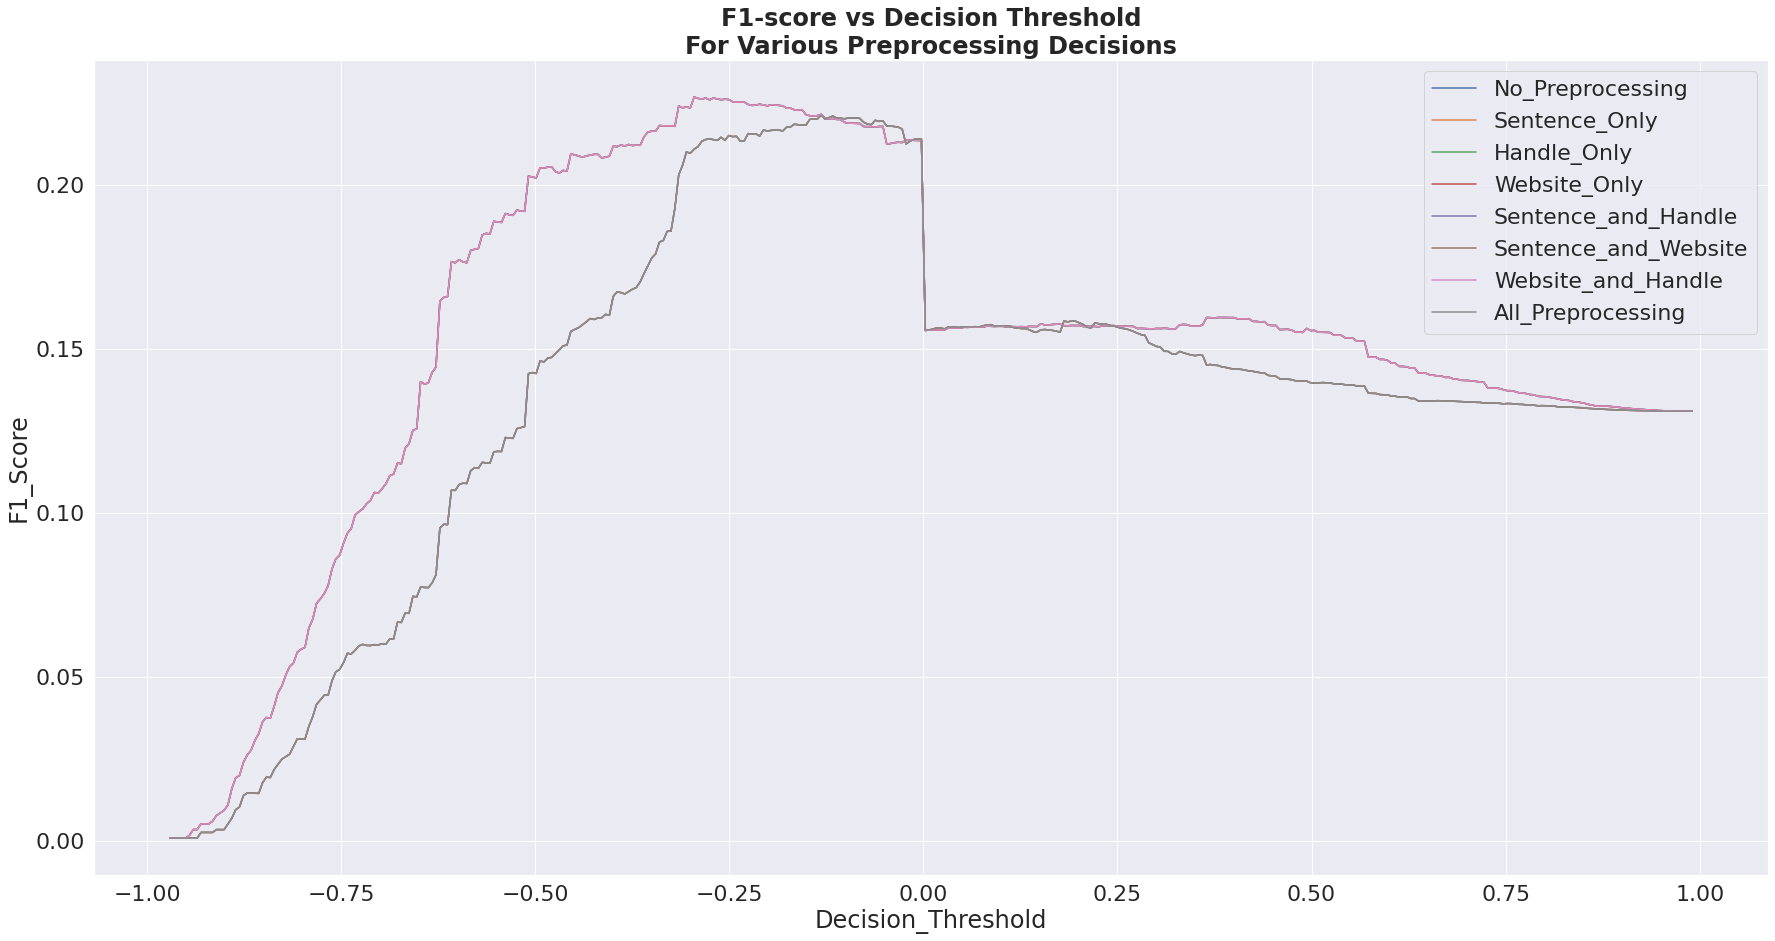

In [ ]:
fix, axs = plt.subplots(nrows = 1, ncols = 1, figsize=(30, 15), squeeze=False)
sns.set(font_scale=2)

for index, df_info in enumerate(all_dfs): 
  preprocess_strategy = df_info[0]
  df = df_info[1]

  sns.lineplot(x='Decision_Threshold', y='F1_Score', data=df, ax=axs[0][0], legend='full', label=preprocess_strategy)

axs[0][0].set_title("F1-score vs Decision Threshold\nFor Various Preprocessing Decisions", fontsize=24, weight='bold')

  #---------------------------------------------------------------------------------------------------------------------------------------------------------
  # This plot is very interesting, and bottom line up front - we have just shown that the only data cleaning decision that really makes any difference
  # in the classification decisions (and classification metrics) is the sentence level analysis decision. 
  #
  # The reason there are only two lines when the legend shows eight is that each line is actually four different lines drawn on top of eachother.
  # 
  # The top (pink) line, contains all combinations of decisions that do not use sentence level analysis (i.e. website only, twitter handles only,
  # websites and twitter handles both, and no preprocessing)
  #
  # The bottom line contains lines for every combination of decisions that did involve sentence level analysis (i.e. sentence only, sentence and twitter
  # handle, sentence and website, and all preprocessing).  
  #
  # The reason why this was happening was not immediately obvious, but upon further investigation (see next plot), it turns out that although any of the
  # decisions may slightly impact one of the vader subscores (pos, neg and neu), the one of the data cleaning decisions that will change the compound
  # score that is used for classification is the sentence level analysis decision. 
  #
  #
  #---------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# Create a table of the maximum F1_Score and the associated decision threshold for each of the 8 data cleaning decision. 

no_preprocess_max = vader_no_preprocess_df.loc[vader_no_preprocess_df['F1_Score'] == vader_no_preprocess_df['F1_Score'].max(), :].loc[:, ['Decision_Threshold', 'F1_Score']]
no_preprocess_max['Cleaning_Decision'] = "No_Preprocessing"

handle_only_max = vader_handle_only_df.loc[vader_handle_only_df['F1_Score'] == vader_handle_only_df['F1_Score'].max(), :].loc[:, ['Decision_Threshold', 'F1_Score']]
handle_only_max['Cleaning_Decision'] = "Handle_Only"

website_only_max = vader_website_only_df.loc[vader_website_only_df['F1_Score'] == vader_website_only_df['F1_Score'].max(), :].loc[:, ['Decision_Threshold', 'F1_Score']]
website_only_max['Cleaning_Decision'] = "Website_Only"

website_and_handle_max = vader_website_and_handle_df.loc[vader_website_and_handle_df['F1_Score'] == vader_website_and_handle_df['F1_Score'].max(), :].loc[:, ['Decision_Threshold', 'F1_Score']]
website_and_handle_max['Cleaning_Decision'] = "Website_and_Handle"

sentence_only_max = vader_sentence_only_df.loc[vader_sentence_only_df['F1_Score'] == vader_sentence_only_df['F1_Score'].max(), :].loc[:, ['Decision_Threshold', 'F1_Score']]
sentence_only_max['Cleaning_Decision'] = 'Sentence_Only'

sentence_and_handle_max = vader_sentence_and_handle_df.loc[vader_sentence_and_handle_df['F1_Score'] == vader_sentence_and_handle_df['F1_Score'].max(), :].loc[:, ['Decision_Threshold', 'F1_Score']]
sentence_and_handle_max['Cleaning_Decision'] = "Sentence_and_Handle"

sentence_and_website_max = vader_sentence_and_website_df.loc[vader_sentence_and_website_df['F1_Score'] == vader_sentence_and_website_df['F1_Score'].max(), :].loc[:, ['Decision_Threshold', 'F1_Score']]
sentence_and_website_max['Cleaning_Decision'] = 'Sentence_and_Website'

all_preprocessing_max = vader_all_preprocessing_df.loc[vader_all_preprocessing_df['F1_Score'] == vader_all_preprocessing_df['F1_Score'].max(), :].loc[:, ['Decision_Threshold', 'F1_Score']]
all_preprocessing_max['Cleaning_Decision'] = 'All_Preprocessing'

all_max_df = pd.concat([no_preprocess_max, handle_only_max, website_only_max, website_and_handle_max, sentence_only_max,
                     sentence_and_handle_max, sentence_and_website_max, all_preprocessing_max])

all_max_df.head(8)

,Decision_Threshold,F1_Score,Cleaning_Decision
2940,-0.295263,0.226888,No_Preprocessing
1340,-0.295263,0.226888,Handle_Only
2140,-0.295263,0.226888,Website_Only
540,-0.295263,0.226888,Website_and_Handle
2573,-0.131504,0.221345,Sentence_Only
973,-0.131504,0.221345,Sentence_and_Handle
1773,-0.131504,0.221345,Sentence_and_Website
173,-0.131504,0.221345,All_Preprocessing


Text(0.5, 1.0, 'Distribution of Compound Scores across the tweet dataset')

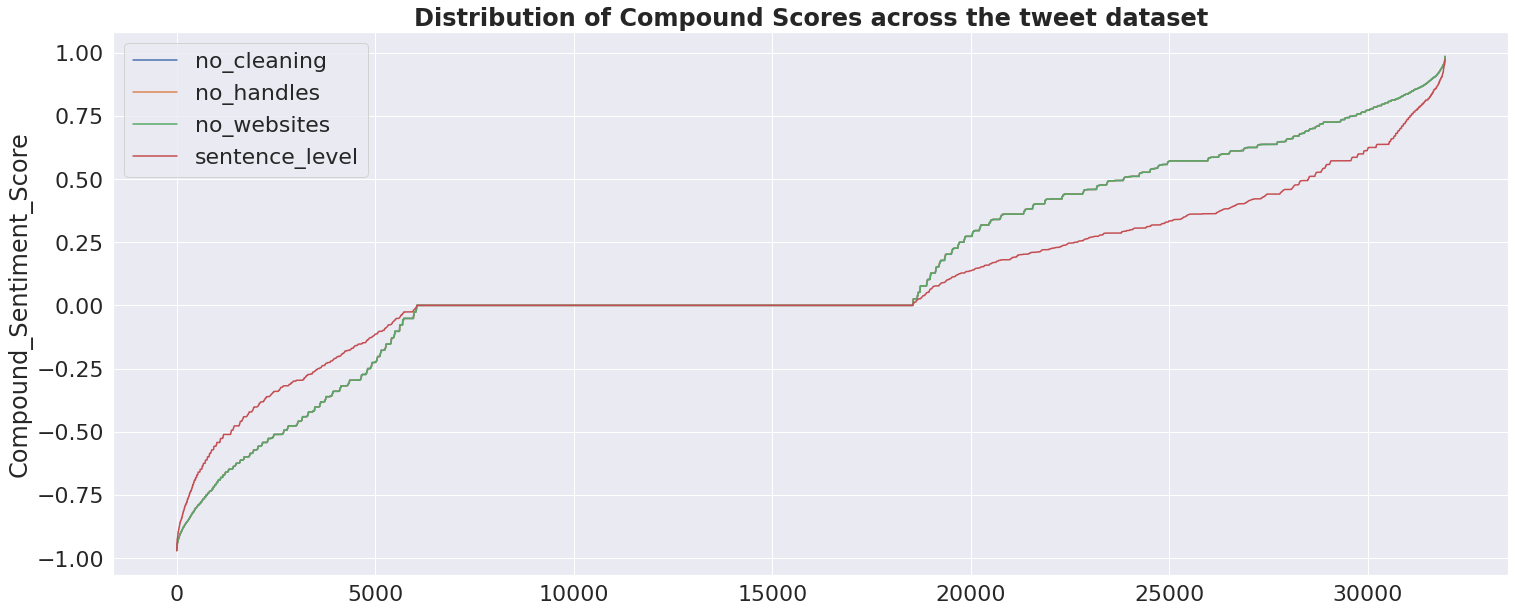

In [ ]:
df_list = [('no_cleaning', vtweet_no_c_df), ('no_handles', vtweet_no_h_df),
           ('no_websites', vtweet_no_w_df), ('sentence_level', vtweet_s_level_df)]

fix, axs = plt.subplots(nrows = 1, ncols = 1, figsize=(25, 10), squeeze=False)
sns.set(font_scale=2)

for index, df_info in enumerate(df_list): 
  preprocess_strategy = df_info[0]
  df = df_info[1]

  if preprocess_strategy == 'sentence_level': 
    df.sort_values(by='Sentence_Level_compound_Score', ignore_index=True, inplace=True)
    y_ax = 'Sentence_Level_compound_Score'
  else:
    df.sort_values(by='Compound_Sentiment_Score', ignore_index=True, inplace=True)
    y_ax = 'Compound_Sentiment_Score'

  sns.lineplot(x=list(df.index), y=y_ax, data=df, ax=axs[0][0], legend='full', label=preprocess_strategy)

axs[0][0].set_title("Distribution of Compound Scores across the tweet dataset", fontsize=24, weight='bold')


#------------------------------------------------------------------------------------------------------------------------------------------
# This plot confirms the results of the previous plot. There are four lines drawn but only two visible, which is due to the fact that
# the three lines that do not involve using sentence level analysis are all drawn on top of eachother.
#
# In the following cells I will do a similar plot for the positive negative and nuetral scores. The take away here is that removing
# twitter handles and websites from the tweet may slightly affect the subscores, but will do so in such a way that the underlying
# compound score (and therefore the classification decision and classification metrics) remain unchanged.
#
#------------------------------------------------------------------------------------------------------------------------------------------

Text(0.5, 1.0, 'Distribution of Positive Sentiment Scores across the tweet dataset')

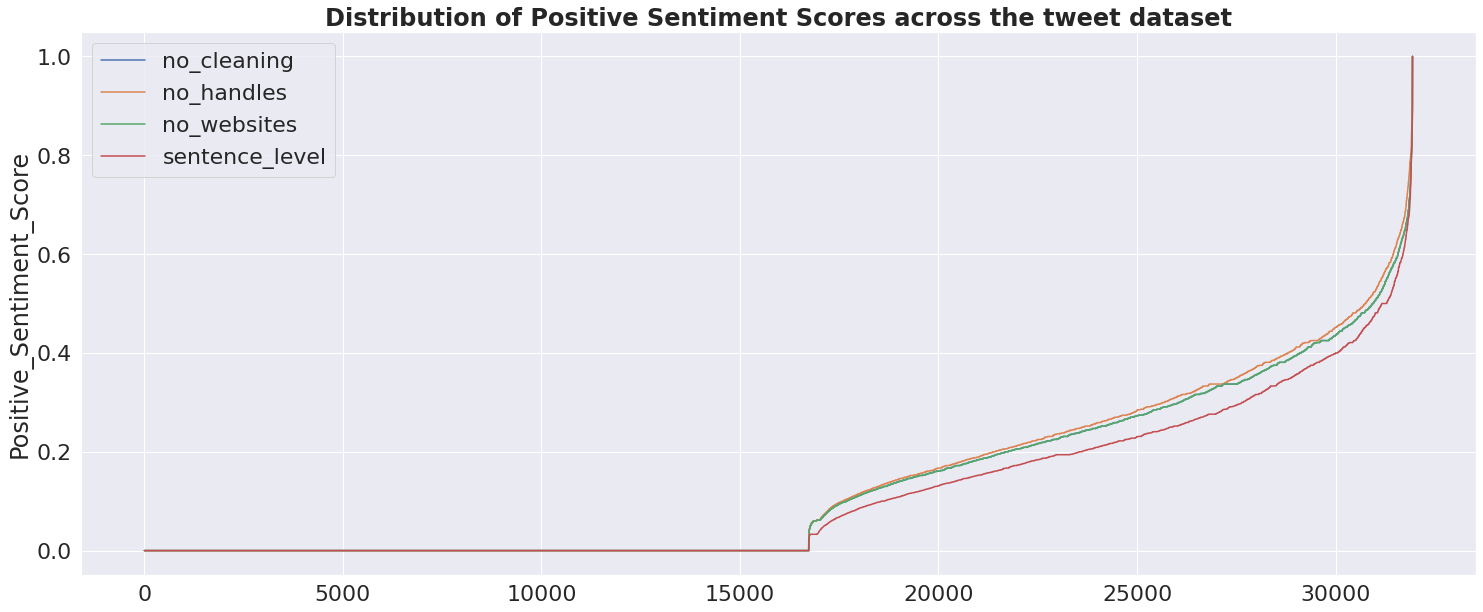

In [ ]:
fix, axs = plt.subplots(nrows = 1, ncols = 1, figsize=(25, 10), squeeze=False)
sns.set(font_scale=2)

for index, df_info in enumerate(df_list): 
  preprocess_strategy = df_info[0]
  df = df_info[1]

  if preprocess_strategy == 'sentence_level': 
    df.sort_values(by='Sentence_Level_pos_Score', ignore_index=True, inplace=True)
    y_ax = 'Sentence_Level_pos_Score'
  else:
    df.sort_values(by='Positive_Sentiment_Score', ignore_index=True, inplace=True)
    y_ax = 'Positive_Sentiment_Score'

  sns.lineplot(x=list(df.index), y=y_ax, data=df, ax=axs[0][0], legend='full', label=preprocess_strategy)

axs[0][0].set_title("Distribution of Positive Sentiment Scores across the tweet dataset", fontsize=24, weight='bold')

Text(0.5, 1.0, 'Distribution of Negative Sentiment Scores across the tweet dataset')

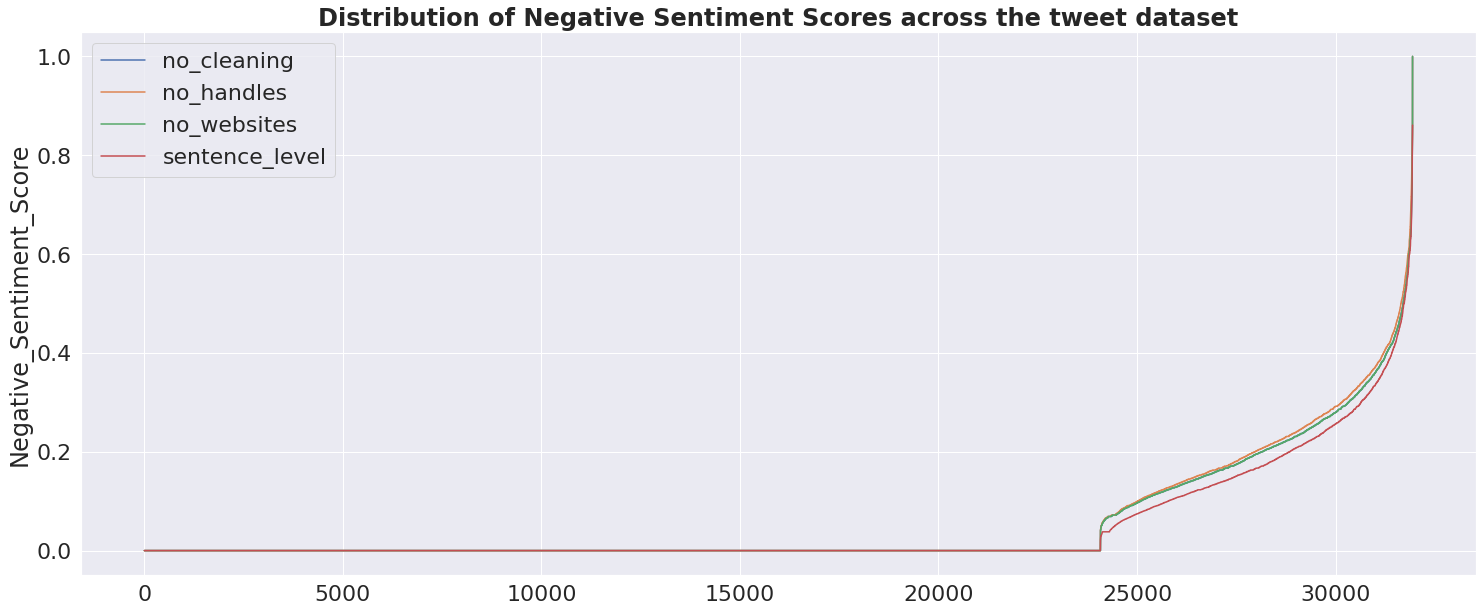

In [ ]:
fix, axs = plt.subplots(nrows = 1, ncols = 1, figsize=(25, 10), squeeze=False)
sns.set(font_scale=2)

for index, df_info in enumerate(df_list): 
  preprocess_strategy = df_info[0]
  df = df_info[1]

  if preprocess_strategy == 'sentence_level': 
    df.sort_values(by='Sentence_Level_neg_Score', ignore_index=True, inplace=True)
    y_ax = 'Sentence_Level_neg_Score'
  else:
    df.sort_values(by='Negative_Sentiment_Score', ignore_index=True, inplace=True)
    y_ax = 'Negative_Sentiment_Score'

  sns.lineplot(x=list(df.index), y=y_ax, data=df, ax=axs[0][0], legend='full', label=preprocess_strategy)

axs[0][0].set_title("Distribution of Negative Sentiment Scores across the tweet dataset", fontsize=24, weight='bold')

Text(0.5, 1.0, 'Distribution of Neutral Sentiment Scores across the tweet dataset')

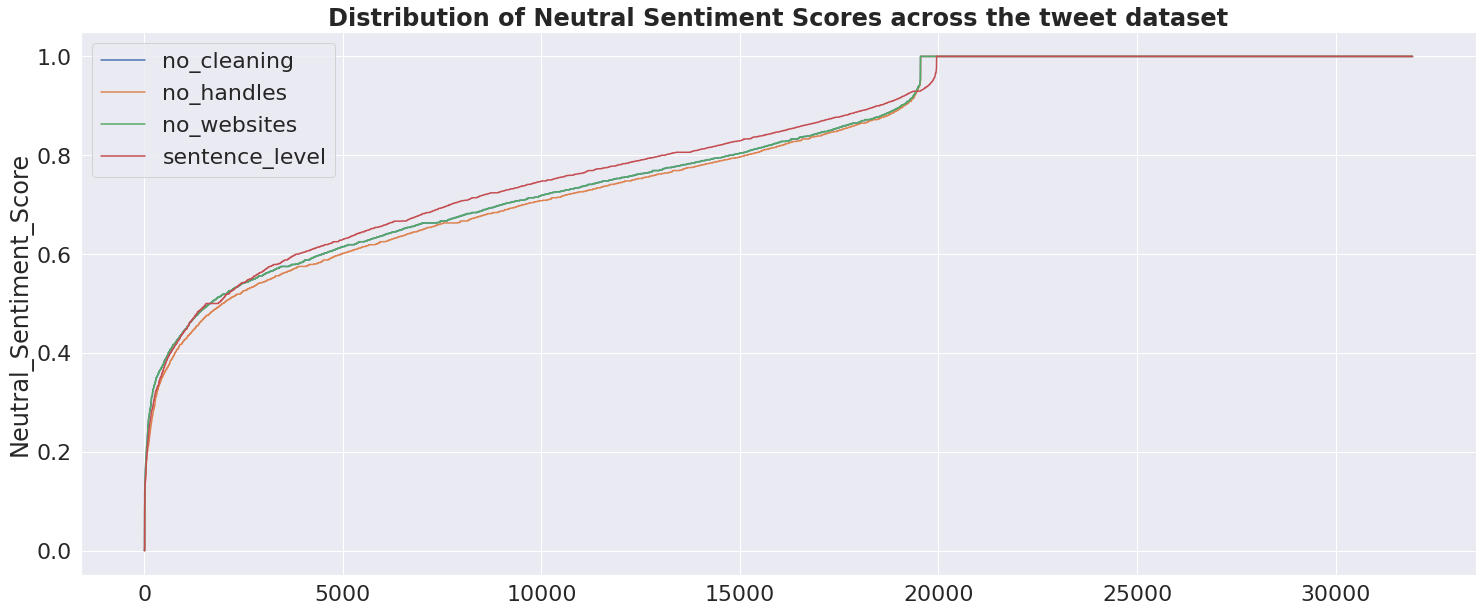

In [ ]:
fix, axs = plt.subplots(nrows = 1, ncols = 1, figsize=(25, 10), squeeze=False)
sns.set(font_scale=2)

for index, df_info in enumerate(df_list): 
  preprocess_strategy = df_info[0]
  df = df_info[1]

  if preprocess_strategy == 'sentence_level': 
    df.sort_values(by='Sentence_Level_neu_Score', ignore_index=True, inplace=True)
    y_ax = 'Sentence_Level_neu_Score'
  else:
    df.sort_values(by='Neutral_Sentiment_Score', ignore_index=True, inplace=True)
    y_ax = 'Neutral_Sentiment_Score'

  sns.lineplot(x=list(df.index), y=y_ax, data=df, ax=axs[0][0], legend='full', label=preprocess_strategy)

axs[0][0].set_title("Distribution of Neutral Sentiment Scores across the tweet dataset", fontsize=24, weight='bold')